<a href="https://colab.research.google.com/github/MayankJasoria/CKD-Analysis/blob/master/ckd_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#######################################################################################
# Author: Mayank Jasoria                                                              #
# Undergraduate Student, Batch of 2021                                                #
# Birla Institute of Technology and Science, Pilani, Rajasthan, India                 #
# Last modified: 08/05/2020                                                           #
# Copyright (c) 2020 Mayank Jasoria                                                   #
# "CKD" Solution given below                                                          #
#######################################################################################

### Pandas Dependency for pandas-profiling (0.25.x) [Refer here](https://github.com/pandas-profiling/pandas-profiling/issues/401)

In [2]:
!pip install pandas==0.25.3

     |████████████████████████████████| 10.4MB 3.4MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
  Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Successfully uninstalled pandas-1.0.3


# Importing necessary libraries / Modules

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
%matplotlib inline 
# %config InlineBackend.figure_format = 'svg'
seed = 12345 # Random Seed, to be used for maintaining repeatable partitioning [NOTE: This should not be modified!]
verbose = 0 # Type of Info to show while training a model

In [2]:
pd.__version__ # Check the version of pandas being used

'0.25.3'

### Mounting drive with colab, for fetching data [2 times auth verification]

In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.21-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.21-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.21-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

# Loading Data, and Reading its Statistics

### Loading data


In [5]:
df = pd.read_csv('/content/drive/dop/kidney_disease.csv')
df.head(2)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd


### Finding mean, std, other for each numerical column of the dataset

In [6]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Data Preprocessing


### Finding total unique output labels

In [7]:
df['classification'].unique(), len(df)

(array(['ckd', 'ckd\t', 'notckd'], dtype=object), 400)

### Get names of column which have atleast one NaN value

In [8]:
df.columns[df.isna().any()]

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

### Heat Map of Missing Values

Text(0.5, 1.0, 'Heat Map of Missing Values')

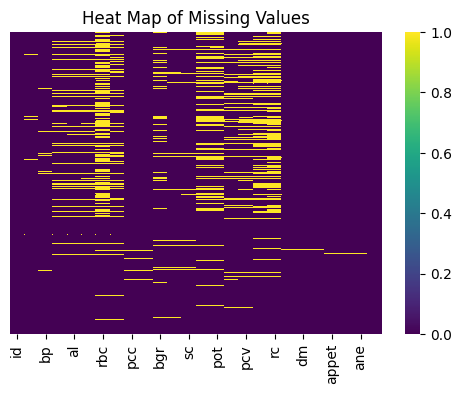

In [9]:
plt.figure(dpi=100)
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')
plt.title('Heat Map of Missing Values')
# plt.savefig('abc.png',dpi=1200)

### Complete Profile of Dataset 

In [10]:
import pandas_profiling as pp
pp.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,26
Number of observations,400
Total Missing (%),9.7%
Total size in memory,81.4 KiB
Average record size in memory,208.3 B
Numeric,12
Categorical,14
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Here I am extracting missing values in our dataset.

* age has 9 (2.2%) missing values
* al has 46 (11.5%) missing values
* ba has 4 (1.0%) missing values
* bgr has 44 (11.0%) missing values
* bp has 12 (3.0%) missing values
* bu has 19 (4.7%) missing values
* hemo has 52 (13.0%) missing values
* pc has 65 (16.2%) missing values
* pcc has 4 (1.0%) missing values
* pcv has 70 (17.5%) missing values
* pot has 88 (22.0%) missing values
* rbc has 152 (38.0%) missing values
* rc has 130 (32.5%) missing values
* sc has 17 (4.2%) missing values
* sg has 47 (11.8%) missing values
* sod has 87 (21.8%) missing values
* su has 49 (12.3%) missing values
* wc has 105 (26.2%) missing values

Other Observations:
* wc has a high cardinality: 93 distinct values
* al has 199 (49.8%) zeros
* su has 290 (72.5%) zeros

### Modifying individual columns

Dropping Columns having high percentage of missing values

In [0]:
df.drop(['pot','rbc','rc','sod','wc','id'],axis=1,inplace=True)

In [12]:
print("Mean of Ages is %d"%df['age'].mean())
df['age'].value_counts()

Mean of Ages is 51


60.0    19
65.0    17
48.0    12
50.0    12
55.0    12
        ..
14.0     1
81.0     1
22.0     1
26.0     1
79.0     1
Name: age, Length: 76, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 20 columns):
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe                399 non-null object
ane               399 non-null object
classification    400 non-null object
dtypes: float64(9), object(11)
memory usage: 62.6+ KB


Replacing '\t', '?' in pcv column, and transforming it to type 'numeric', and filling 'NULL' with mean

In [14]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [15]:
df['pcv'].replace(['\t?','\t43'],[np.nan,43],inplace=True)
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '52', '14',
       '22', '18', '42', '17', '46', '23', '19', '25', '41', '26', '15',
       '21', '43', '20', 43, '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [0]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce', downcast='integer')
df['pcv'].fillna(int(df['pcv'].mean()),inplace=True)

In [17]:
df['pcv'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., 16., 24., 37.,
       30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17., 46.,
       23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49., 50.,
       53., 51., 54.])

Filling 'NULL' in 'bp' with 80, as a approximate, normal blood pressure (mode)

In [0]:
df['bp'].fillna(80,inplace=True)

Filling 'NULL' in 'sg' with its mode

In [0]:
df['sg'].fillna(df['sg'].mode(),inplace=True)

Filling 'NULL' in 'su' with its mode

In [0]:
df['su'].fillna(df['su'].mode(),inplace=True)

Distribution of 'al' shows an imbalance of data

In [21]:
df['al'].value_counts()

0.0    199
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: al, dtype: int64

Creating an additional column 'al_unchanged' to show the original state of 'al', and transform 'al' such that all values above 0 are converted to 1 (this should balance the distribution). The heuristic is that any value of al above 0 may be treated as abnormal. Thus, al = 0 --> normal, al > 0 --> abnormal

In [22]:
df['al_unchanged'] = df['al'].tolist()
df.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,pcv,htn,dm,cad,appet,pe,ane,classification,al_unchanged
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,1.2,15.4,44.0,yes,yes,no,good,no,no,ckd,1.0
1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,18.0,0.8,11.3,38.0,no,no,no,good,no,no,ckd,4.0
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,1.8,9.6,31.0,no,yes,no,poor,no,yes,ckd,2.0
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,3.8,11.2,32.0,yes,no,no,poor,yes,yes,ckd,4.0
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,1.4,11.6,35.0,no,no,no,good,no,no,ckd,2.0


In [23]:
order = [0,1,2,3,20,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19] # setting column's order
df = df[[df.columns[i] for i in order]]

df['al'] = df['al'].replace(2, 1)
df['al'] = df['al'].replace(3, 1)
df['al'] = df['al'].replace(4, 1)
df['al'] = df['al'].replace(5, 1)
df.head()

,age,bp,sg,al,al_unchanged,su,pc,pcc,ba,bgr,bu,sc,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,1.2,15.4,44.0,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,1.0,4.0,0.0,normal,notpresent,notpresent,NaN,18.0,0.8,11.3,38.0,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,1.0,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,1.8,9.6,31.0,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,1.0,4.0,0.0,abnormal,present,notpresent,117.0,56.0,3.8,11.2,32.0,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,1.0,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,1.4,11.6,35.0,no,no,no,good,no,no,ckd


Filling 'NULL' of 'pc', 'pcc', and 'ba' with the biologically normal values

In [0]:
df['pc'].fillna('normal',inplace=True)
df['pcc'].fillna('notpresent',inplace=True)

df['ba'].fillna('notpresent',inplace=True)

Filling 'NULL' in 'bgr', 'bu', 'sc', and 'hemo' with their means (as appropriate type, integer or real number)

In [0]:
df['bgr'].fillna(int(df['bgr'].mean()),inplace=True)
df['bu'].fillna(int(df['bu'].mean()),inplace=True)
df['sc'].fillna(round(df['sc'].mean(), 1),inplace=True)

df['hemo'].fillna(int(df['hemo'].mean()),inplace=True)

Replacing inconsistent tabs ('\t') in data wherever they are present

In [0]:
df['cad'] = df['cad'].replace("\tno", "no")
df['cad'] = df['cad'].replace("no\t", "no")
df['cad'] = df['cad'].replace("\tyes", "yes")
df['cad'] = df['cad'].replace("yes\t", "yes")

df['dm'] = df['dm'].replace("\tyes", "yes")
df['dm'] = df['dm'].replace("yes\t", "yes")

df['dm'] = df['dm'].replace("\tno", "no")
df['dm'] = df['dm'].replace("no\t", "no")

Filling all remaining categorical columns with the mode (biological normal)

In [0]:
df['dm'].fillna('no',inplace=True)
df['cad'].fillna('no',inplace=True)
df['appet'].fillna('good',inplace=True)
df['pe'].fillna('no',inplace=True)
df['ane'].fillna('no',inplace=True)
df['htn'].fillna('no',inplace=True)

Dropping all remaining rows which have 'NULL' entries anywhere in the row

In [28]:
df.dropna(axis=0, inplace=True)
len(df)

343

Converting all columns which are of float type, but are integers in the dataset, to int:


*   age
*   bp
*   al
*   su
*   bgr
*   bu
*   hemo
*   pcv





In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 399
Data columns (total 21 columns):
age               343 non-null float64
bp                343 non-null float64
sg                343 non-null float64
al                343 non-null float64
al_unchanged      343 non-null float64
su                343 non-null float64
pc                343 non-null object
pcc               343 non-null object
ba                343 non-null object
bgr               343 non-null float64
bu                343 non-null float64
sc                343 non-null float64
hemo              343 non-null float64
pcv               343 non-null float64
htn               343 non-null object
dm                343 non-null object
cad               343 non-null object
appet             343 non-null object
pe                343 non-null object
ane               343 non-null object
classification    343 non-null object
dtypes: float64(11), object(10)
memory usage: 59.0+ KB


In [30]:
df = df.astype({"age":int, "bp":int, "al":int, "su":int, "bgr":int, "bu":int, "hemo":int, "pcv":int})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 399
Data columns (total 21 columns):
age               343 non-null int64
bp                343 non-null int64
sg                343 non-null float64
al                343 non-null int64
al_unchanged      343 non-null float64
su                343 non-null int64
pc                343 non-null object
pcc               343 non-null object
ba                343 non-null object
bgr               343 non-null int64
bu                343 non-null int64
sc                343 non-null float64
hemo              343 non-null int64
pcv               343 non-null int64
htn               343 non-null object
dm                343 non-null object
cad               343 non-null object
appet             343 non-null object
pe                343 non-null object
ane               343 non-null object
classification    343 non-null object
dtypes: float64(3), int64(8), object(10)
memory usage: 59.0+ KB


In [31]:
df.head()

,age,bp,sg,al,al_unchanged,su,pc,pcc,ba,bgr,bu,sc,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,1.0,0,normal,notpresent,notpresent,121,36,1.2,15,44,yes,yes,no,good,no,no,ckd
1,7,50,1.020,1,4.0,0,normal,notpresent,notpresent,148,18,0.8,11,38,no,no,no,good,no,no,ckd
2,62,80,1.010,1,2.0,3,normal,notpresent,notpresent,423,53,1.8,9,31,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,1,4.0,0,abnormal,present,notpresent,117,56,3.8,11,32,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,1,2.0,0,normal,notpresent,notpresent,106,26,1.4,11,35,no,no,no,good,no,no,ckd


Replacing the extra '\t' in some occurrences of ckd, from classification column, then converting:

*   ckd: 1
*   notckd: 0



In [0]:
df.classification=df.classification.replace("ckd\t","ckd")

df.classification=[1 if each=="ckd" else 0 for each in df.classification]

Replacing all categorical data with numerical equivalents

In [0]:
df.reset_index(drop=True, inplace=True)

dictionary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [0]:
#We used categorical values as numerical to replace them.
df=df.replace(dictionary)

### Heat Map representing correlation among attributes and targets

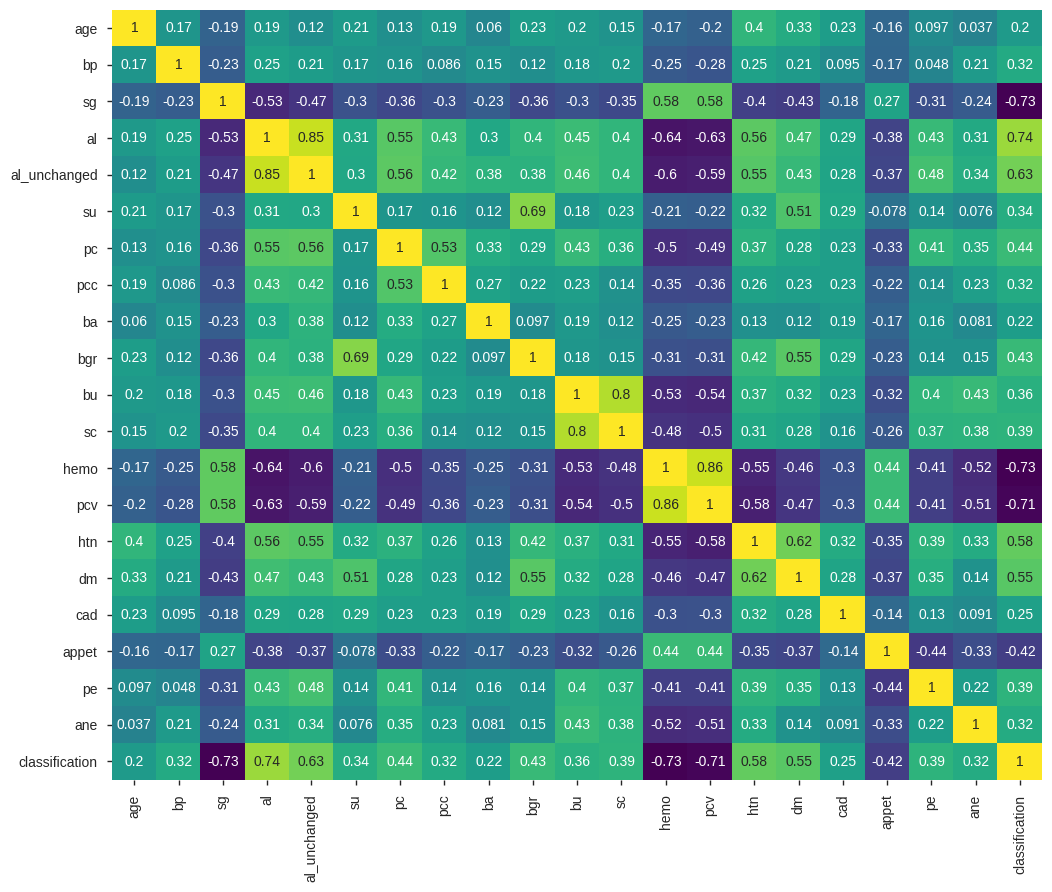

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True,cbar=False)
plt.savefig('/content/drive/dop/results/corr_heat_map.png',dpi=1200)

### Pie chart of output

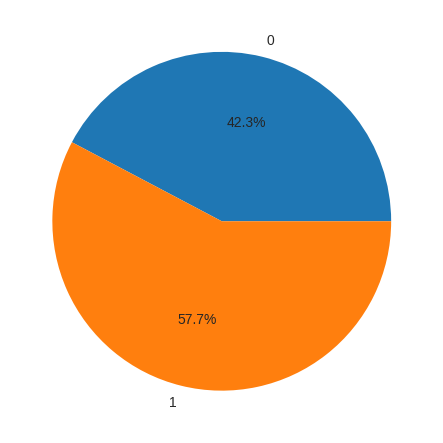

In [36]:
Y = df['classification'].values
import numpy as np
labels = list(set(Y))
counts = []
for label in labels:
    counts.append(np.count_nonzero(Y == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()
plt.savefig('/content/drive/dop/results/output_pie_chart.png',dpi=1200)

### Histograms of all columns

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

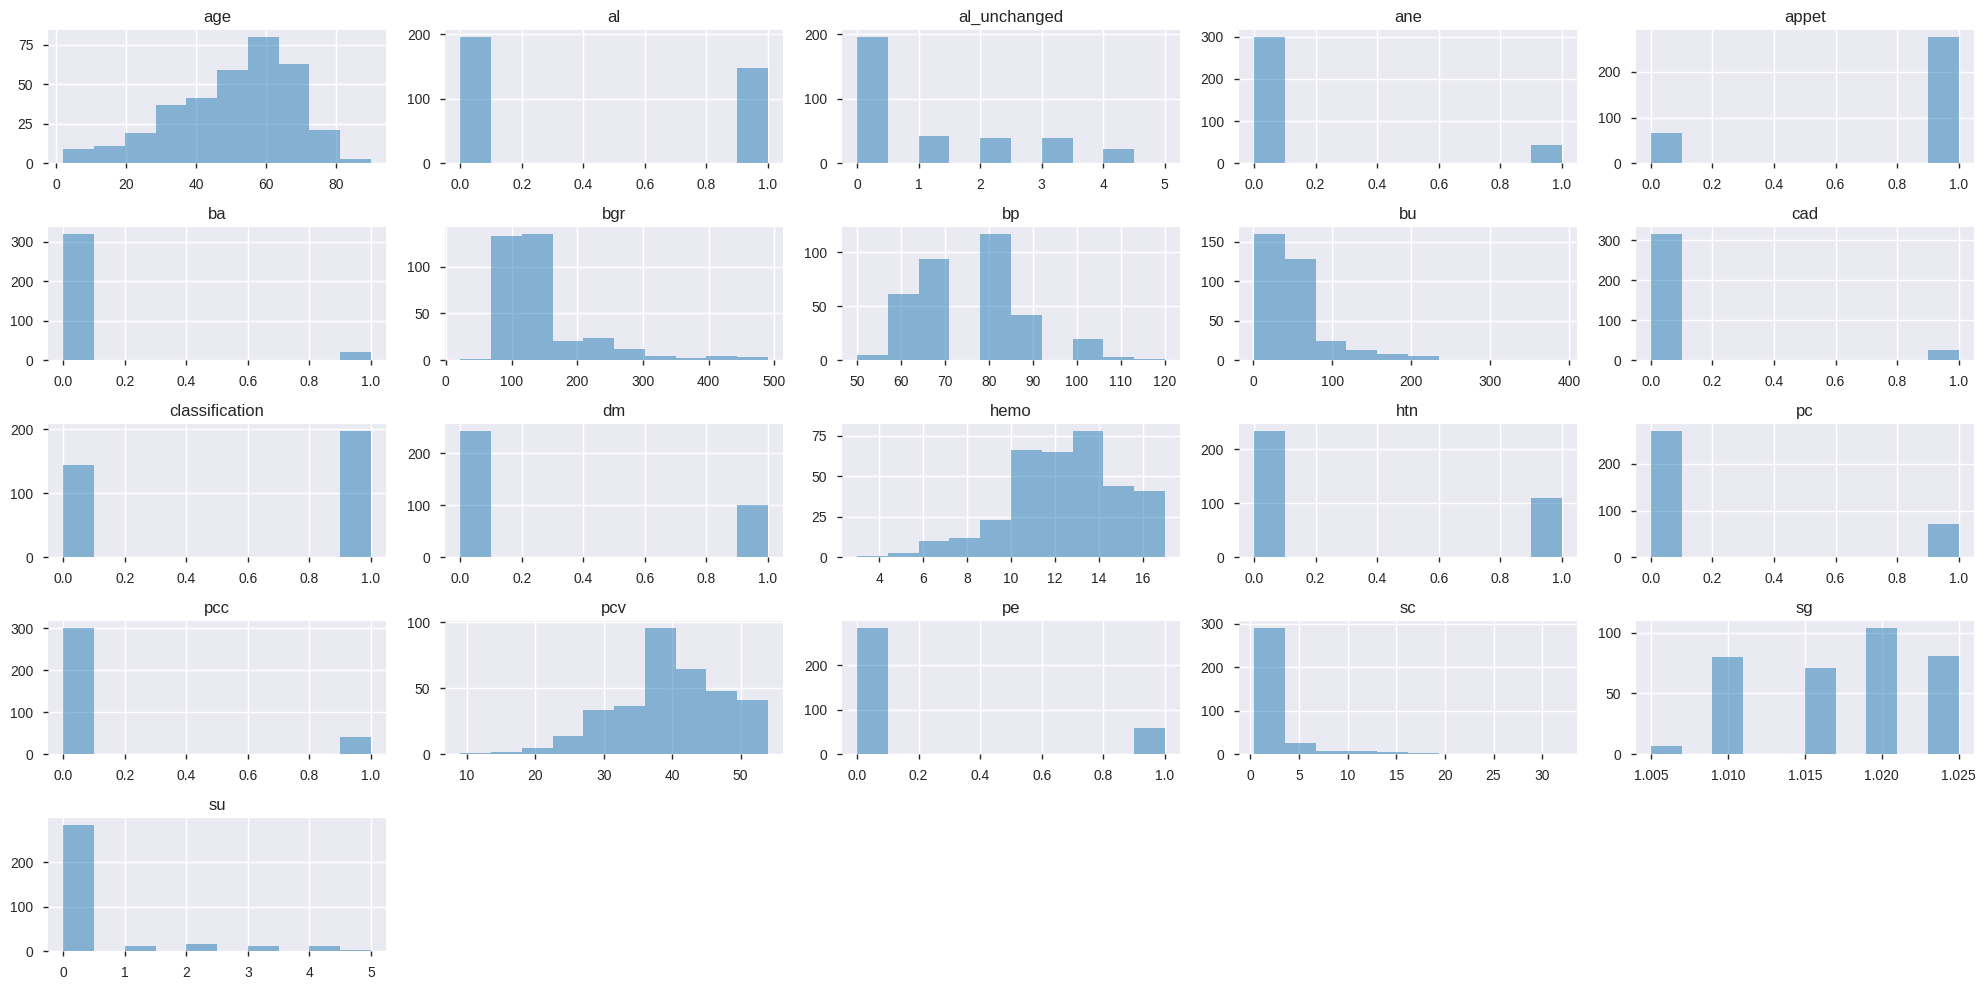

In [37]:
df.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/dop/results/features_histogram.png',dpi=1200)

In [0]:
# df_corr.sort_values(by=['classification'], ascending = False)

# Building Models

In [0]:
df_6_feat = df[['al','htn','dm','pcv','sg','hemo','classification']] # Features having absolute value of correlation with classification > 0.5
df_5_feat = df[['al','sc','htn','bu','dm','classification']] # Previously selected features

### Separating features and target


Uncomment the appropriate line, and run block of code again

In [63]:
dataset = df.values # For all features
# dataset = df_6_feat.values # For the 6 selected features
# dataset = df_5_feat.values # For the previously selected 5 features

X = dataset[:,0:dataset.shape[1]-1]
y = dataset[:,dataset.shape[1]-1]

dataset.shape, X.shape, y.shape

((343, 21), (343, 20), (343,))

### Creating Training and Testing splits

In [64]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=seed, stratify=y)
print(f'X Training Sample:{X_train.shape}')
print(f'X Test Sample:{X_test.shape}')
print(f'Y Training Sample:{y_train.shape}')
print(f'Y Test Sample:{y_test.shape}')

X Training Sample:(274, 20)
X Test Sample:(69, 20)
Y Training Sample:(274,)
Y Test Sample:(69,)


### Creating Model instances with appropriate parameters

In [0]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sys
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import os
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import time
#Documentation of hypopt - https://www.pydoc.io/pypi/hypopt-1.0.3/autoapi/model_selection/index.html
#Edited version -> added cohen score as metric!
# from hypopt import GridSearch
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import ExtraTreesClassifier #Compare with decision tree
from sklearn.gaussian_process import GaussianProcessClassifier
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier #Compare with decision tree
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture

### ROC function

In [0]:
####################<AUC-ROC FOR CLASSIFICATION>########################################
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class
        other_class = [x for x in unique_class if x != per_class]
        
        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]
        
        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
    
    return roc_auc_dict

##############################################################################################################################

### Training all models

In [67]:
model_runtime = []
dataset_size = []
train_size = []
val_size = []
test_size = []
train_pos = []
val_pos = []
test_pos = []
models = []
feature_used = []
target = []
accuracy_test = []
TP_test = []
TN_test = []
FP_test = []
FN_test = []
c_kappa_test = []
LOG_loss_test = []
precision_0_test = []
recall_0_test = []
f1_score_0_test = []
precision_1_test = []
recall_1_test = []
f1_score_1_test = []
auc_test_0 = []
auc_test_1 = []
save_params = []
dataset_size = []
train_size = []
test_size = []
train_pos = []
test_pos = []

model_mappings = {
    'RandomForestClassifier': RandomForestClassifier(random_state=seed),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=seed),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=seed),
    'MLPClassifier': MLPClassifier(random_state=seed),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=seed),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'LogisticRegression': LogisticRegression(random_state=seed),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'MultinomialNB': MultinomialNB(),
    'XGBClassifier': XGBClassifier(random_state=seed),
    'DummyClassifier': DummyClassifier(random_state=seed),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(random_state=seed,probability = True),
    'NuSVC': NuSVC(random_state=seed,probability = True),
    'BaggingClassifier': BaggingClassifier(random_state=seed),
    'BernoulliNB': BernoulliNB(),
    'ComplementNB': ComplementNB(),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=seed),
    'GaussianProcessClassifier': GaussianProcessClassifier(random_state=seed),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(random_state=seed),
    'ExtraTreeClassifier': ExtraTreeClassifier(random_state=seed),
    'LinearSVC': LinearSVC(random_state=seed),
    'NearestCentroid': NearestCentroid(),
    'OneVsOneClassifier': OneVsOneClassifier(MultinomialNB()),
    'OneVsRestClassifier': OneVsRestClassifier(LogisticRegression()),
    'OutputCodeClassifier': OutputCodeClassifier(MultinomialNB()),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(random_state=seed),
    'Perceptron': Perceptron(random_state=seed),
    'RidgeClassifier': RidgeClassifier(random_state=seed),
    'SGDClassifier': SGDClassifier(random_state=seed),
    'BayesianGaussianMixture': BayesianGaussianMixture(random_state=seed),
    'GaussianMixture': GaussianMixture(random_state=seed)

}

for clf in model_mappings:

    opt = model_mappings[clf]
    opt.fit(X_train, y_train)
    name = opt.__class__.__name__
    models.append(name)
    save_params.append(str(opt.get_params()))

    dataset_size.append(X_train.shape[0] + X_test.shape[0])
    train_size.append(X_train.shape[0])
    test_size.append(X_test.shape[0])
    train_pos.append(np.count_nonzero(y_train))
    test_pos.append(np.count_nonzero(y_test))
    
    print("="*30)
    print(name)
    
    print('****Results****')

    test_predictions = opt.predict(X_test)
    acc = accuracy_score(y_test, test_predictions)
    accuracy_test.append("{0:.3f}".format(acc))
    tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
    TP_test.append(tp)
    TN_test.append(tn)
    FP_test.append(fp)
    FN_test.append(fn)
    class_rep = classification_report(y_test, test_predictions, output_dict = True)
    precision_0_test.append("{0:.3f}".format(class_rep['0.0']['precision']))
    recall_0_test.append("{0:.3f}".format(class_rep['0.0']['recall']))
    f1_score_0_test.append("{0:.3f}".format(class_rep['0.0']['f1-score']))
    precision_1_test.append("{0:.3f}".format(class_rep['1.0']['precision']))
    recall_1_test.append("{0:.3f}".format(class_rep['1.0']['recall']))
    f1_score_1_test.append("{0:.3f}".format(class_rep['1.0']['f1-score']))
    cohen_score = cohen_kappa_score(y_test, test_predictions)
    c_kappa_test.append("{0:.3f}".format(cohen_score))
    print("Accuracy_Test: {:.3%}".format(acc))
    print("Confusion Mat Stats (Test Set):")
    print("TP = {0}, TN = {1}, FP = {2}, FN = {3}".format(tp, tn, fp, fn))
    print("Cohen Score (Test): {:.3f}".format(cohen_score))
    class_rep = classification_report(y_test, test_predictions)
    # print("Full Report (Test): ", class_rep)

    auc_outputs = roc_auc_score_multiclass(y_test, test_predictions)
    auc_test_0.append("{0:.3f}".format(auc_outputs[0]))
    auc_test_1.append("{0:.3f}".format(auc_outputs[1]))
    
print("="*30)

RandomForestClassifier
****Results****
Accuracy_Test: 100.000%
Confusion Mat Stats (Test Set):
TP = 40, TN = 29, FP = 0, FN = 0
Cohen Score (Test): 1.000
DecisionTreeClassifier
****Results****
Accuracy_Test: 100.000%
Confusion Mat Stats (Test Set):
TP = 40, TN = 29, FP = 0, FN = 0
Cohen Score (Test): 1.000
AdaBoostClassifier
****Results****
Accuracy_Test: 98.551%
Confusion Mat Stats (Test Set):
TP = 39, TN = 29, FP = 0, FN = 1
Cohen Score (Test): 0.970


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification

MLPClassifier
****Results****
Accuracy_Test: 94.203%
Confusion Mat Stats (Test Set):
TP = 36, TN = 29, FP = 0, FN = 4
Cohen Score (Test): 0.883
GradientBoostingClassifier
****Results****
Accuracy_Test: 98.551%
Confusion Mat Stats (Test Set):
TP = 39, TN = 29, FP = 0, FN = 1
Cohen Score (Test): 0.970
LinearDiscriminantAnalysis
****Results****
Accuracy_Test: 95.652%
Confusion Mat Stats (Test Set):
TP = 37, TN = 29, FP = 0, FN = 3
Cohen Score (Test): 0.912
QuadraticDiscriminantAnalysis
****Results****
Accuracy_Test: 42.029%
Confusion Mat Stats (Test Set):
TP = 0, TN = 29, FP = 0, FN = 40
Cohen Score (Test): 0.000


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


LogisticRegression
****Results****
Accuracy_Test: 94.203%
Confusion Mat Stats (Test Set):
TP = 36, TN = 29, FP = 0, FN = 4
Cohen Score (Test): 0.883
KNeighborsClassifier
****Results****
Accuracy_Test: 81.159%
Confusion Mat Stats (Test Set):
TP = 29, TN = 27, FP = 2, FN = 11
Cohen Score (Test): 0.629
MultinomialNB
****Results****
Accuracy_Test: 86.957%
Confusion Mat Stats (Test Set):
TP = 31, TN = 29, FP = 0, FN = 9
Cohen Score (Test): 0.743
XGBClassifier
****Results****
Accuracy_Test: 100.000%
Confusion Mat Stats (Test Set):
TP = 40, TN = 29, FP = 0, FN = 0
Cohen Score (Test): 1.000
DummyClassifier
****Results****
Accuracy_Test: 59.420%
Confusion Mat Stats (Test Set):
TP = 23, TN = 18, FP = 11, FN = 17
Cohen Score (Test): 0.190
GaussianNB
****Results****
Accuracy_Test: 94.203%
Confusion Mat Stats (Test Set):
TP = 36, TN = 29, FP = 0, FN = 4
Cohen Score (Test): 0.883
SVC
****Results****
Accuracy_Test: 78.261%
Confusion Mat Stats (Test Set):
TP = 30, TN = 24, FP = 5, FN = 10
Cohen Score 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning

### Storing all models metrics

In [0]:
def save_results(path):
    
    #    Creating and saving csv files
    labels = ['Models']
    df_report = pd.DataFrame(models,columns=labels)
    # df_report['Input_feature'] = feature_used
    df_report['Hyperparameters_Used'] = save_params
    # df_report['Model_RunTime_min'] = model_runtime
    df_report['Dataset_size'] = dataset_size
    df_report['Train_size'] = train_size
    df_report['Test_size'] = test_size
    df_report['Train_positive_size'] = train_pos
    df_report['Test_positive_size'] = test_pos
    df_report['Accuracy_Test'] = accuracy_test
    df_report['True_Positive_Test'] = TP_test
    df_report['True_Negative_Test'] = TN_test
    df_report['False_Positive_Test'] = FP_test
    df_report['False_Negative_Test'] = FN_test
    df_report['Cohen_Score_Test'] = c_kappa_test
    df_report['Precision_0_Test'] = precision_0_test
    df_report['Recall_0_Test'] = recall_0_test
    df_report['F1_Score_0_Test'] = f1_score_0_test
    df_report['AUC_output_0_Test'] = auc_test_0
    df_report['Precision_1_Test'] = precision_1_test
    df_report['Recall_1_Test'] = recall_1_test
    df_report['F1 Score_1_Test'] = f1_score_1_test
    df_report['AUC_output_1_Test'] = auc_test_1

    df_report.sort_values(by=['Cohen_Score_Test'], ascending = False, inplace=True)
    df_report.reset_index(drop=True,inplace=True)

    df_report.to_csv(path)

    return df_report

### Save results (Change Path + File Name before running)

In [0]:
df_report = save_results('/content/drive/dop/results/6_features_result.csv')

# Result Analysis of 3 different features (**individually**) given below

In [0]:
df_report_5_feat = pd.read_csv('/content/drive/dop/results/5_features_result.csv', index_col = 0)
df_report_6_feat = pd.read_csv('/content/drive/dop/results/6_features_result.csv', index_col = 0)
df_report_all_feat = pd.read_csv('/content/drive/dop/results/all_features_result.csv', index_col = 0)

### Results of 5 features given below

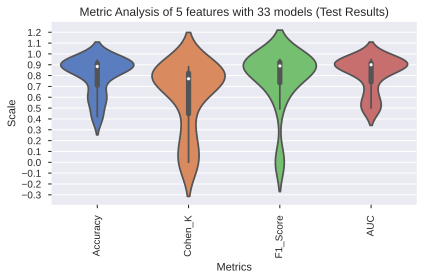

In [71]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'
feat_5_metrics = []

feat_5_metrics.append(df_report_5_feat['Accuracy_Test'].to_list())
feat_5_metrics.append(df_report_5_feat['Cohen_Score_Test'].to_list())
feat_5_metrics.append(df_report_5_feat['F1 Score_1_Test'].to_list())
feat_5_metrics.append(df_report_5_feat['AUC_output_1_Test'].to_list())

from matplotlib import pylab
import matplotlib.ticker as ticker

    
tick_spacing = 0.1
ax = sns.violinplot(data= (feat_5_metrics), palette="muted",scale='width')
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlabel('Metrics')
ax.set_ylabel('Scale')
ax.set_title('Metric Analysis of 5 features with 33 models (Test Results)')
ax.set_xticklabels(['Accuracy','Cohen_K','F1_Score','AUC'])
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)
plt.xticks(rotation=89)
plt.tight_layout()
plt.savefig('/content/drive/dop/results/5_features.png',dpi=1200)


### Results of 6 features given below

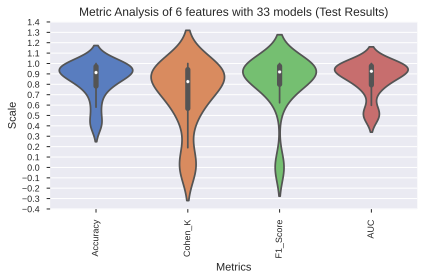

In [72]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'
feat_6_metrics = []

feat_6_metrics.append(df_report_6_feat['Accuracy_Test'].to_list())
feat_6_metrics.append(df_report_6_feat['Cohen_Score_Test'].to_list())
feat_6_metrics.append(df_report_6_feat['F1 Score_1_Test'].to_list())
feat_6_metrics.append(df_report_6_feat['AUC_output_1_Test'].to_list())

from matplotlib import pylab
import matplotlib.ticker as ticker

tick_spacing = 0.1
ax = sns.violinplot(data= (feat_6_metrics), palette="muted",scale='width')
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlabel('Metrics')
ax.set_ylabel('Scale')
ax.set_title('Metric Analysis of 6 features with 33 models (Test Results)')
ax.set_xticklabels(['Accuracy','Cohen_K','F1_Score','AUC'])
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)
plt.xticks(rotation=89)
plt.tight_layout()
plt.savefig('/content/drive/dop/results/6_features.png',dpi=1200)


### Results of all features given below

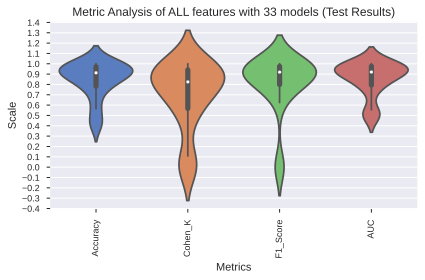

In [73]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'
feat_all_metrics = []

feat_all_metrics.append(df_report_all_feat['Accuracy_Test'].to_list())
feat_all_metrics.append(df_report_all_feat['Cohen_Score_Test'].to_list())
feat_all_metrics.append(df_report_all_feat['F1 Score_1_Test'].to_list())
feat_all_metrics.append(df_report_all_feat['AUC_output_1_Test'].to_list())

from matplotlib import pylab
import matplotlib.ticker as ticker

    
tick_spacing = 0.1
ax = sns.violinplot(data= (feat_all_metrics), palette="muted",scale='width')
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlabel('Metrics')
ax.set_ylabel('Scale')
ax.set_title('Metric Analysis of ALL features with 33 models (Test Results)')
ax.set_xticklabels(['Accuracy','Cohen_K','F1_Score','AUC'])
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)
plt.xticks(rotation=89)
plt.tight_layout()
plt.savefig('/content/drive/dop/results/all_features.png',dpi=1200)


# Comparing models of all 3 types of features

### Comparing different feature models using **Cohen Kappa** metric

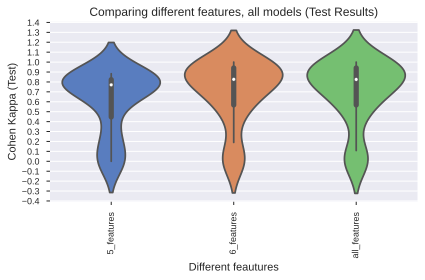

In [74]:
from matplotlib import pylab
import matplotlib.ticker as ticker
    
cohen_all = []

cohen_all.append(df_report_5_feat['Cohen_Score_Test'].to_list())
cohen_all.append(df_report_6_feat['Cohen_Score_Test'].to_list())
cohen_all.append(df_report_all_feat['Cohen_Score_Test'].to_list())

tick_spacing = 0.1
ax = sns.violinplot(data= (cohen_all), palette="muted",scale='width')
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlabel('Different feautures')
ax.set_ylabel('Cohen Kappa (Test)')
ax.set_title('Comparing different features, all models (Test Results)')
ax.set_xticklabels(['5_features','6_features','all_features'])
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)
plt.xticks(rotation=89)
plt.tight_layout()
plt.savefig('/content/drive/dop/results/compare_cohen.png',dpi=1200)

### Comparing different feature models using **Accuracy** metric

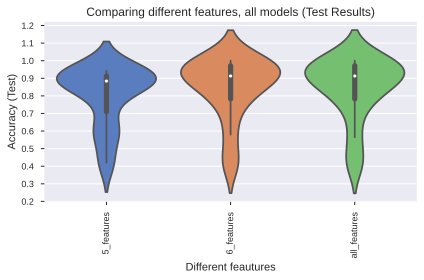

In [75]:
from matplotlib import pylab
import matplotlib.ticker as ticker
    
acc_all = []

acc_all.append(df_report_5_feat['Accuracy_Test'].to_list())
acc_all.append(df_report_6_feat['Accuracy_Test'].to_list())
acc_all.append(df_report_all_feat['Accuracy_Test'].to_list())

tick_spacing = 0.1
ax = sns.violinplot(data= (acc_all), palette="muted",scale='width')
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlabel('Different feautures')
ax.set_ylabel('Accuracy (Test)')
ax.set_title('Comparing different features, all models (Test Results)')
ax.set_xticklabels(['5_features','6_features','all_features'])
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)
plt.xticks(rotation=89)
plt.tight_layout()
plt.savefig('/content/drive/dop/results/compare_accuracy.png',dpi=1200)

### Comparing different feature models using **F1 Score** metric

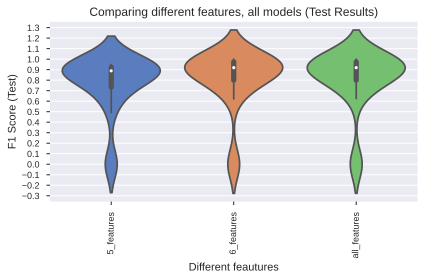

In [76]:
from matplotlib import pylab
import matplotlib.ticker as ticker
    
f1_all = []

f1_all.append(df_report_5_feat['F1 Score_1_Test'].to_list())
f1_all.append(df_report_6_feat['F1 Score_1_Test'].to_list())
f1_all.append(df_report_all_feat['F1 Score_1_Test'].to_list())

tick_spacing = 0.1
ax = sns.violinplot(data= (f1_all), palette="muted",scale='width')
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlabel('Different feautures')
ax.set_ylabel('F1 Score (Test)')
ax.set_title('Comparing different features, all models (Test Results)')
ax.set_xticklabels(['5_features','6_features','all_features'])
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)
plt.xticks(rotation=89)
plt.tight_layout()
plt.savefig('/content/drive/dop/results/compare_f1score.png',dpi=1200)

### Comparing different feature models using **AUC** metric

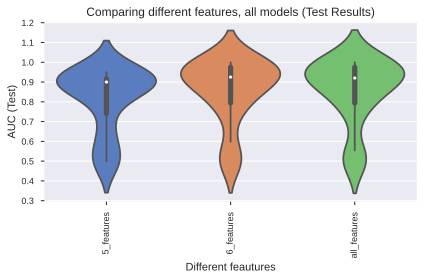

In [77]:
from matplotlib import pylab
import matplotlib.ticker as ticker
    
auc_all = []

auc_all.append(df_report_5_feat['AUC_output_1_Test'].to_list())
auc_all.append(df_report_6_feat['AUC_output_1_Test'].to_list())
auc_all.append(df_report_all_feat['AUC_output_1_Test'].to_list())

tick_spacing = 0.1
ax = sns.violinplot(data= (auc_all), palette="muted",scale='width')
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlabel('Different feautures')
ax.set_ylabel('AUC (Test)')
ax.set_title('Comparing different features, all models (Test Results)')
ax.set_xticklabels(['5_features','6_features','all_features'])
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)
plt.xticks(rotation=89)
plt.tight_layout()
plt.savefig('/content/drive/dop/results/compare_auc.png',dpi=1200)

# Correlation of Features with Albumin (values of albumin from 0 to 5)

In [0]:
# df_corr_al_unchanged = df[['al_unchanged','pc','hemo','pcv','htn','classification']]
df_corr = df.corr()
df_corr.loc['al_unchanged']

age               0.117572
bp                0.214843
sg               -0.469079
al                0.852050
al_unchanged      1.000000
su                0.297945
pc                0.562919
pcc               0.419535
ba                0.382609
bgr               0.376302
bu                0.456554
sc                0.399362
hemo             -0.603994
pcv              -0.589460
htn               0.545133
dm                0.429185
cad               0.280652
appet            -0.372049
pe                0.480281
ane               0.343281
classification    0.631462
Name: al_unchanged, dtype: float64

Utility function to add labels to the top of each column in the grouped column graph

In [0]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

### Analysis of 'hemo' with al

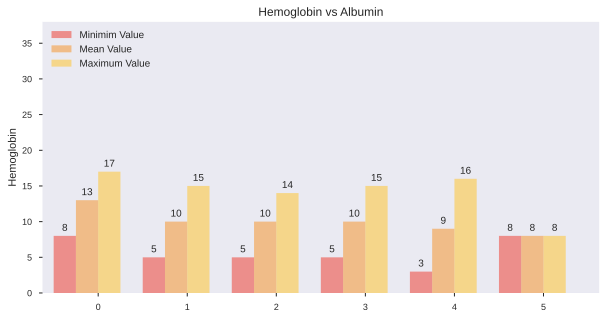

<Figure size 432x288 with 0 Axes>

In [94]:
raw_data = {
  'al': [],
  'mean': [],
  'min': [],
  'max': []
}

for i in range (0,6,1):
  raw_data['al'].append(i)
  raw_data['mean'].append(int(df[df['al_unchanged'] == i]['hemo'].mean()))
  raw_data['min'].append(df[df['al_unchanged'] == i]['hemo'].min())
  raw_data['max'].append(df[df['al_unchanged'] == i]['hemo'].max())

plot_df = pd.DataFrame(raw_data, columns=['al', 'mean', 'min', 'max'])

# Setting the positions and width for the bars
pos = list(range(len(plot_df['al']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
bar1 = plt.bar(pos, 
        #using plot_df['min'] data,
        plot_df['min'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in al
        label=plot_df['al'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
bar2 = plt.bar([p + width for p in pos], 
        #using plot_df['mean'] data,
        plot_df['mean'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in al
        label=plot_df['al'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
bar3 = plt.bar([p + width*2 for p in pos], 
        #using df['max'] data,
        plot_df['max'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in al
        label=plot_df['al'][2]) 

# Set the y axis label
ax.set_ylabel('Hemoglobin')

# Set the chart's title
ax.set_title('Hemoglobin vs Albumin')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(plot_df['al'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(plot_df['min'] + plot_df['mean'] + plot_df['max'])] )

# Adding the legend and showing the plot
plt.legend(['Minimim Value', 'Mean Value', 'Maximum Value'], loc='upper left')
plt.grid()

# Adding labels to the top of each bar in the graph
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()

plt.savefig('/content/drive/dop/results/hemo_vs_al.png',dpi=1200)

### Analysis of 'pcv' with al

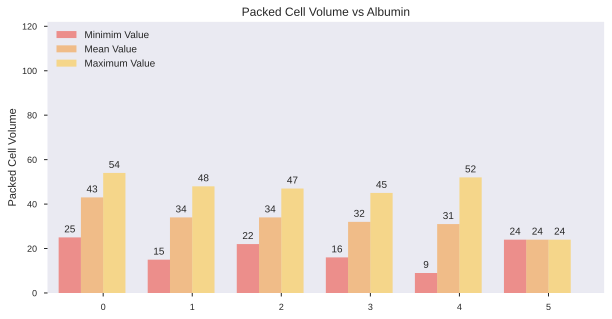

<Figure size 432x288 with 0 Axes>

In [97]:
raw_data = {
  'al': [],
  'mean': [],
  'min': [],
  'max': []
}

for i in range (0,6,1):
  raw_data['al'].append(i)
  raw_data['mean'].append(int(df[df['al_unchanged'] == i]['pcv'].mean()))
  raw_data['min'].append(df[df['al_unchanged'] == i]['pcv'].min())
  raw_data['max'].append(df[df['al_unchanged'] == i]['pcv'].max())

plot_df = pd.DataFrame(raw_data, columns=['al', 'mean', 'min', 'max'])

# Setting the positions and width for the bars
pos = list(range(len(plot_df['al']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
bar1 = plt.bar(pos, 
        #using plot_df['min'] data,
        plot_df['min'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in al
        label=plot_df['al'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
bar2 = plt.bar([p + width for p in pos], 
        #using plot_df['mean'] data,
        plot_df['mean'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in al
        label=plot_df['al'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
bar3 = plt.bar([p + width*2 for p in pos], 
        #using df['max'] data,
        plot_df['max'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in al
        label=plot_df['al'][2]) 

# Set the y axis label
ax.set_ylabel('Packed Cell Volume')

# Set the chart's title
ax.set_title('Packed Cell Volume vs Albumin')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(plot_df['al'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(plot_df['min'] + plot_df['mean'] + plot_df['max'])] )

# Adding the legend and showing the plot
plt.legend(['Minimim Value', 'Mean Value', 'Maximum Value'], loc='upper left')
plt.grid()

# Adding labels to the top of each bar in the graph
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()

plt.savefig('/content/drive/dop/results/pcv_vs_al.png',dpi=1200)

### Analysis of 'pc' with al

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


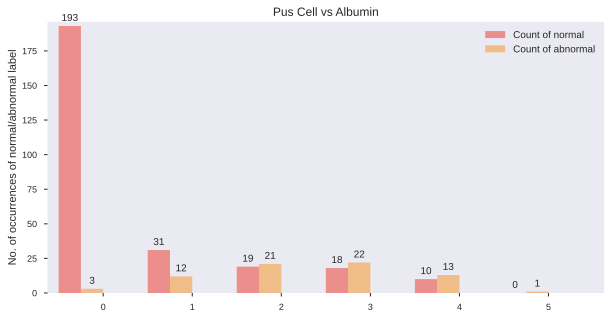

<Figure size 432x288 with 0 Axes>

In [106]:
raw_data = {
  'al': [],
  'count_0': [],
  'count_1': []
}

for i in range (0,6,1):
  raw_data['al'].append(i)
  raw_data['count_0'].append(len(df[df['al_unchanged'] == i][df['pc'] == 0]))
  raw_data['count_1'].append(len(df[df['al_unchanged'] == i][df['pc'] == 1]))

raw_data

plot_df = pd.DataFrame(raw_data, columns=['al', 'count_0', 'count_1'])

# Setting the positions and width for the bars
pos = list(range(len(plot_df['al']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
bar1 = plt.bar(pos, 
        #using plot_df['count_0'] data,
        plot_df['count_0'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in al
        label=plot_df['al'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
bar2 = plt.bar([p + width for p in pos], 
        #using plot_df['count_1'] data,
        plot_df['count_1'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in al
        label=plot_df['al'][1]) 

# Set the y axis label
ax.set_ylabel('No. of occurrences of normal/abnormal label')

# Set the chart's title
ax.set_title('Pus Cell vs Albumin')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(plot_df['al'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(plot_df['count_0'] + plot_df['count_1'])] )

# Adding the legend and showing the plot
plt.legend(['Count of normal', 'Count of abnormal'], loc='upper right')
plt.grid()

# Adding labels to the top of each bar in the graph
autolabel(bar1)
autolabel(bar2)

plt.show()

plt.savefig('/content/drive/dop/results/pc_vs_al.png',dpi=1200)

### Analysis of 'htn' with al

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


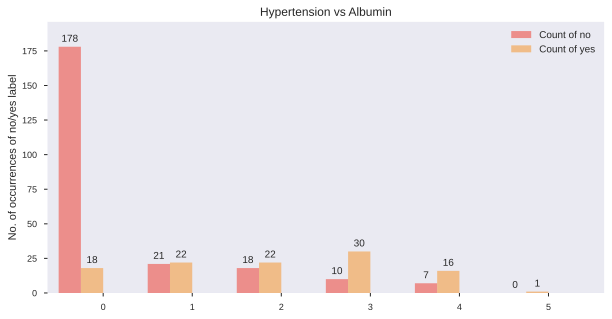

<Figure size 432x288 with 0 Axes>

In [107]:
raw_data = {
  'al': [],
  'count_0': [],
  'count_1': []
}

for i in range (0,6,1):
  raw_data['al'].append(i)
  raw_data['count_0'].append(len(df[df['al_unchanged'] == i][df['htn'] == 0]))
  raw_data['count_1'].append(len(df[df['al_unchanged'] == i][df['htn'] == 1]))

raw_data

plot_df = pd.DataFrame(raw_data, columns=['al', 'count_0', 'count_1'])

# Setting the positions and width for the bars
pos = list(range(len(plot_df['al']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
bar1 = plt.bar(pos, 
        #using plot_df['count_0'] data,
        plot_df['count_0'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in al
        label=plot_df['al'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
bar2 = plt.bar([p + width for p in pos], 
        #using plot_df['count_1'] data,
        plot_df['count_1'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in al
        label=plot_df['al'][1]) 

# Set the y axis label
ax.set_ylabel('No. of occurrences of no/yes label')

# Set the chart's title
ax.set_title('Hypertension vs Albumin')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(plot_df['al'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(plot_df['count_0'] + plot_df['count_1'])] )

# Adding the legend and showing the plot
plt.legend(['Count of no', 'Count of yes'], loc='upper right')
plt.grid()

# Adding labels to the top of each bar in the graph
autolabel(bar1)
autolabel(bar2)

plt.show()

plt.savefig('/content/drive/dop/results/htn_vs_al.png',dpi=1200)

### Analysis of 'classification' with al

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


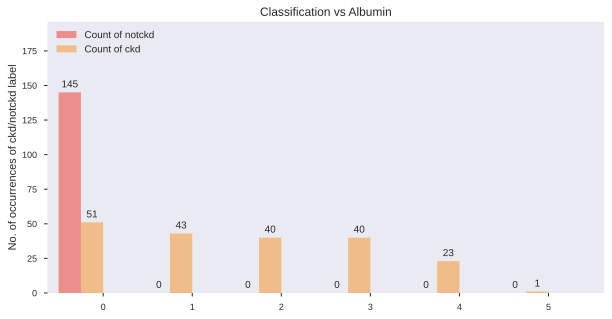

<Figure size 432x288 with 0 Axes>

In [99]:
raw_data = {
  'al': [],
  'count_0': [],
  'count_1': []
}

for i in range (0,6,1):
  raw_data['al'].append(i)
  raw_data['count_0'].append(len(df[df['al_unchanged'] == i][df['classification'] == 0]))
  raw_data['count_1'].append(len(df[df['al_unchanged'] == i][df['classification'] == 1]))

raw_data

plot_df = pd.DataFrame(raw_data, columns=['al', 'count_0', 'count_1'])

# Setting the positions and width for the bars
pos = list(range(len(plot_df['al']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
bar1 = plt.bar(pos, 
        #using plot_df['count_0'] data,
        plot_df['count_0'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in al
        label=plot_df['al'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
bar2 = plt.bar([p + width for p in pos], 
        #using plot_df['count_1'] data,
        plot_df['count_1'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in al
        label=plot_df['al'][1]) 

# Set the y axis label
ax.set_ylabel('No. of occurrences of ckd/notckd label')

# Set the chart's title
ax.set_title('Classification vs Albumin')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(plot_df['al'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(plot_df['count_0'] + plot_df['count_1'])] )

# Adding the legend and showing the plot
plt.legend(['Count of notckd', 'Count of ckd'], loc='upper left')
plt.grid()

# Adding labels to the top of each bar in the graph
autolabel(bar1)
autolabel(bar2)

plt.show()

plt.savefig('/content/drive/dop/results/classification_vs_al.png',dpi=1200)